## Overview
> 1. Download the Communities and Crime data1
from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the frst 1495 rows of data asthe training set and the rest as the test set.  
2. The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.  
3. Plot a correlation matrix for the features in the data set.   
4.  Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample variance and m is sample mean..  
5.  Pick 128 features with highest CV , and make scatter plots and box plots for them.
6.  Fit a linear model using least squares to the training set and report the test error.    
7.  Fit a ridge regression model on the training set, with \$\lambda\$  chosen by cross-validation. Report the test error obtained.  
8.  Fit a LASSO model on the training set, with \$\lambda\$ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.
9.  Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.  
10. In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. 

## Data Cleaning and Data Preparation

In [45]:
# import  libaries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
from matplotlib import style
style.use("ggplot")
import seaborn as sns

%matplotlib inline

In [46]:
# read data
df = pd.read_csv('./data/communities.txt',header=None,names=["col_" + str(i) for i in range(127)] + ['goal'])
# set train size 
train_size = 1495
df

col_0 col_1  col_2                   col_3  col_4  col_5  col_6  col_7  \
0         8     ?      ?            Lakewoodcity      1   0.19   0.33   0.02   
1        53     ?      ?             Tukwilacity      1   0.00   0.16   0.12   
2        24     ?      ?            Aberdeentown      1   0.00   0.42   0.49   
3        34     5  81440     Willingborotownship      1   0.04   0.77   1.00   
4        42    95   6096       Bethlehemtownship      1   0.01   0.55   0.02   
5         6     ?      ?       SouthPasadenacity      1   0.02   0.28   0.06   
6        44     7  41500             Lincolntown      1   0.01   0.39   0.00   
7         6     ?      ?               Selmacity      1   0.01   0.74   0.03   
8        21     ?      ?           Hendersoncity      1   0.03   0.34   0.20   
9        29     ?      ?             Claytoncity      1   0.01   0.40   0.06   
10        6     ?      ?            DalyCitycity      1   0.13   0.71   0.15   
11       36     ?      ?  RockvilleCentrevillage      1   0.02   0.46   0.08   
12       25    21  44105             Needhamtown      1   0.03   0.47   0.01   
13       55    87  30075          GrandChutetown      1   0.01   0.44   0.00   
14        6     ?      ?           DanaPointcity      1   0.04   0.36   0.01   
15       19   187  91370           FortDodgecity      1   0.03   0.34   0.06   
16       36     1   1000              Albanycity      1   0.15   0.31   0.40   
17       34    27  17650        Denvilletownship      1   0.01   0.53   0.01   
18       18     ?      ?          Valparaisocity      1   0.02   0.47   0.01   
19       42   129  66376       Rostravertownship      1   0.00   0.41   0.05   
20        6     ?      ?             Modestocity      1   0.25   0.54   0.05   
21       12    31      ?        Jacksonvillecity      1   1.00   0.42   0.47   
22       41     ?      ?        KlamathFallscity      1   0.01   0.34   0.02   
23       19   193  93926           SiouxCitycity      1   0.11   0.43   0.04   
24        6     ?      ?              Delanocity      1   0.02   0.96   0.05   
25        8     ?      ?              Goldencity      1   0.00   0.33   0.02   
26        6     ?      ?             Gardenacity      1   0.06   0.49   0.46   
27       39    29  61798           Perrytownship      1   0.01   0.37   0.01   
28       54     ?      ?             Beckleycity      1   0.01   0.27   0.43   
29        9     7  22490         EastHamptontown      1   0.00   0.50   0.01   
...     ...   ...    ...                     ...    ...    ...    ...    ...   
1963     36    27  59641        Poughkeepsiecity     10   0.03   0.32   0.61   
1964     36   119  49121         MountVernoncity     10   0.09   0.45   1.00   
1965     18    97      ?        Indianapoliscity     10   1.00   0.36   0.44   
1966      6     ?      ?         RedwoodCitycity     10   0.09   0.41   0.07   
1967     25    17  76135            Westfordtown     10   0.01   0.66   0.00   
1968     34    25  62430          RedBankborough     10   0.00   0.24   0.51   
1969      6     ?      ?        SanFranciscocity     10   1.00   0.29   0.21   
1970     45     ?      ?               Caycecity     10   0.00   0.37   0.38   
1971      1     ?      ?             Decaturcity     10   0.06   0.39   0.32   
1972      6     ?      ?            Redlandscity     10   0.08   0.49   0.07   
1973     39     ?      ?           Englewoodcity     10   0.00   0.38   0.03   
1974     53     ?      ?            Kirklandcity     10   0.05   0.27   0.03   
1975     25    17   1605           Arlingtontown     10   0.06   0.29   0.03   
1976     47     ?      ?           Maryvillecity     10   0.01   0.35   0.06   
1977      9     1   4720              Betheltown     10   0.01   0.54   0.02   
1978     34    39  61530              Rahwaycity     10   0.02   0.43   0.39   
1979     25     5  69170             Tauntoncity     10   0.06   0.43   0.04   
1980      9     9  35650              Hamdentown     10   0.07   0.38   0.17   
1981  

In [47]:
# print df base info
df.describe()

col_0        col_4        col_5        col_6        col_7  \
count  1993.000000  1993.000000  1993.000000  1993.000000  1993.000000   
mean     28.679378     5.491721     0.057622     0.463422     0.179408   
std      16.400609     2.872641     0.126931     0.163753     0.253313   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%      12.000000     3.000000     0.010000     0.350000     0.020000   
50%      34.000000     5.000000     0.020000     0.440000     0.060000   
75%      42.000000     8.000000     0.050000     0.540000     0.230000   
max      56.000000    10.000000     1.000000     1.000000     1.000000   

             col_8        col_9       col_10       col_11       col_12  ...  \
count  1993.000000  1993.000000  1993.000000  1993.000000  1993.000000  ...   
mean      0.753838     0.153748     0.144089     0.424240     0.493919  ...   
std       0.244040     0.208908     0.232531     0.155232     0.143581  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630000     0.040000     0.010000     0.340000     0.410000  ...   
50%       0.850000     0.070000     0.040000     0.400000     0.480000  ...   
75%       0.940000     0.170000     0.160000     0.470000     0.540000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

            col_96       col_97       col_98       col_99      col_100  \
count  1993.000000  1993.000000  1993.000000  1993.000000  1993.000000   
mean      0.215660     0.608726     0.535018     0.626347     0.651440   
std       0.231142     0.204245     0.181392     0.200542     0.198231   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.060000     0.470000     0.420000     0.520000     0.560000   
50%       0.130000     0.630000     0.540000     0.670000     0.700000   
75%       0.280000     0.770000     0.660000     0.770000     0.790000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           col_118      col_119      col_120      col_125         goal  
count  1993.000000  1993.000000  1993.000000  1993.000000  1993.000000  
mean      0.065253     0.232920     0.161766     0.094099     0.237837  
std       0.109482     0.203121     0.229084     0.240379     0.232958  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.020000     0.100000     0.020000     0.000000     0.070000  
50%       0.040000     0.170000     0.070000     0.000000     0.150000  
75%       0.070000     0.280000     0.190000     0.000000     0.330000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 102 columns]

### Pre-process

In [48]:
# Convert ? to NaN
# define function
def getNaN(x):
    if str(x) == '?':return np.nan
    else :return x 
    
# Convert ? to NaN
for i in df.columns:
    df[i] = df[i].apply(getNaN)
df

col_0 col_1  col_2                   col_3  col_4  col_5  col_6  col_7  \
0         8   NaN    NaN            Lakewoodcity      1   0.19   0.33   0.02   
1        53   NaN    NaN             Tukwilacity      1   0.00   0.16   0.12   
2        24   NaN    NaN            Aberdeentown      1   0.00   0.42   0.49   
3        34     5  81440     Willingborotownship      1   0.04   0.77   1.00   
4        42    95   6096       Bethlehemtownship      1   0.01   0.55   0.02   
5         6   NaN    NaN       SouthPasadenacity      1   0.02   0.28   0.06   
6        44     7  41500             Lincolntown      1   0.01   0.39   0.00   
7         6   NaN    NaN               Selmacity      1   0.01   0.74   0.03   
8        21   NaN    NaN           Hendersoncity      1   0.03   0.34   0.20   
9        29   NaN    NaN             Claytoncity      1   0.01   0.40   0.06   
10        6   NaN    NaN            DalyCitycity      1   0.13   0.71   0.15   
11       36   NaN    NaN  RockvilleCentrevillage      1   0.02   0.46   0.08   
12       25    21  44105             Needhamtown      1   0.03   0.47   0.01   
13       55    87  30075          GrandChutetown      1   0.01   0.44   0.00   
14        6   NaN    NaN           DanaPointcity      1   0.04   0.36   0.01   
15       19   187  91370           FortDodgecity      1   0.03   0.34   0.06   
16       36     1   1000              Albanycity      1   0.15   0.31   0.40   
17       34    27  17650        Denvilletownship      1   0.01   0.53   0.01   
18       18   NaN    NaN          Valparaisocity      1   0.02   0.47   0.01   
19       42   129  66376       Rostravertownship      1   0.00   0.41   0.05   
20        6   NaN    NaN             Modestocity      1   0.25   0.54   0.05   
21       12    31    NaN        Jacksonvillecity      1   1.00   0.42   0.47   
22       41   NaN    NaN        KlamathFallscity      1   0.01   0.34   0.02   
23       19   193  93926           SiouxCitycity      1   0.11   0.43   0.04   
24        6   NaN    NaN              Delanocity      1   0.02   0.96   0.05   
25        8   NaN    NaN              Goldencity      1   0.00   0.33   0.02   
26        6   NaN    NaN             Gardenacity      1   0.06   0.49   0.46   
27       39    29  61798           Perrytownship      1   0.01   0.37   0.01   
28       54   NaN    NaN             Beckleycity      1   0.01   0.27   0.43   
29        9     7  22490         EastHamptontown      1   0.00   0.50   0.01   
...     ...   ...    ...                     ...    ...    ...    ...    ...   
1963     36    27  59641        Poughkeepsiecity     10   0.03   0.32   0.61   
1964     36   119  49121         MountVernoncity     10   0.09   0.45   1.00   
1965     18    97    NaN        Indianapoliscity     10   1.00   0.36   0.44   
1966      6   NaN    NaN         RedwoodCitycity     10   0.09   0.41   0.07   
1967     25    17  76135            Westfordtown     10   0.01   0.66   0.00   
1968     34    25  62430          RedBankborough     10   0.00   0.24   0.51   
1969      6   NaN    NaN        SanFranciscocity     10   1.00   0.29   0.21   
1970     45   NaN    NaN               Caycecity     10   0.00   0.37   0.38   
1971      1   NaN    NaN             Decaturcity     10   0.06   0.39   0.32   
1972      6   NaN    NaN            Redlandscity     10   0.08   0.49   0.07   
1973     39   NaN    NaN           Englewoodcity     10   0.00   0.38   0.03   
1974     53   NaN    NaN            Kirklandcity     10   0.05   0.27   0.03   
1975     25    17   1605           Arlingtontown     10   0.06   0.29   0.03   
1976     47   NaN    NaN           Maryvillecity     10   0.01   0.35   0.06   
1977      9     1   4720              Betheltown     10   0.01   0.54   0.02   
1978     34    39  61530              Rahwaycity     10   0.02   0.43   0.39   
1979     25     5  69170             Tauntoncity     10   0.06   0.43   0.04   
1980      9     9  35650              Hamdentown     10   0.07   0.38   0.17   
1981  

In [49]:
df_null = df.isnull().sum() / df.shape[0]
df_null = df_null.reset_index().rename(columns = {"index":"columns",0:"ration"})
df_null['rate_num'] = list(df.isnull().sum())
df_null = df_null.sort_values(by=['ration'],ascending=False)
df_null

columns    ration  rate_num
107  col_107  0.839940      1674
117  col_117  0.839940      1674
108  col_108  0.839940      1674
109  col_109  0.839940      1674
110  col_110  0.839940      1674
111  col_111  0.839940      1674
112  col_112  0.839940      1674
113  col_113  0.839940      1674
114  col_114  0.839940      1674
115  col_115  0.839940      1674
116  col_116  0.839940      1674
104  col_104  0.839940      1674
106  col_106  0.839940      1674
103  col_103  0.839940      1674
102  col_102  0.839940      1674
121  col_121  0.839940      1674
122  col_122  0.839940      1674
123  col_123  0.839940      1674
124  col_124  0.839940      1674
101  col_101  0.839940      1674
126  col_126  0.839940      1674
105  col_105  0.839940      1674
2      col_2  0.590065      1176
1      col_1  0.588560      1173
30    col_30  0.000502         1
85    col_85  0.000000         0
76    col_76  0.000000         0
83    col_83  0.000000         0
82    col_82  0.000000         0
81    col_81  0.000000         0
..       ...       ...       ...
34    col_34  0.000000         0
35    col_35  0.000000         0
62    col_62  0.000000         0
61    col_61  0.000000         0
60    col_60  0.000000         0
59    col_59  0.000000         0
58    col_58  0.000000         0
57    col_57  0.000000         0
56    col_56  0.000000         0
55    col_55  0.000000         0
54    col_54  0.000000         0
53    col_53  0.000000         0
52    col_52  0.000000         0
51    col_51  0.000000         0
50    col_50  0.000000         0
49    col_49  0.000000         0
48    col_48  0.000000         0
47    col_47  0.000000         0
46    col_46  0.000000         0
45    col_45  0.000000         0
44    col_44  0.000000         0
43    col_43  0.000000         0
42    col_42  0.000000         0
41    col_41  0.000000         0
40    col_40  0.000000         0
39    col_39  0.000000         0
38    col_38  0.000000         0
37    col_37  0.000000         0
36    col_36  0.000000         0
127     goal  0.000000         0

[128 rows x 3 columns]

### Data missing ratio

In [50]:
# rebuild data set 
# ignore nonpredictive features
df1 = df.iloc[:,5:].copy()
df1

col_5  col_6  col_7  col_8  col_9  col_10  col_11  col_12  col_13  \
0      0.19   0.33   0.02   0.90   0.12    0.17    0.34    0.47    0.29   
1      0.00   0.16   0.12   0.74   0.45    0.07    0.26    0.59    0.35   
2      0.00   0.42   0.49   0.56   0.17    0.04    0.39    0.47    0.28   
3      0.04   0.77   1.00   0.08   0.12    0.10    0.51    0.50    0.34   
4      0.01   0.55   0.02   0.95   0.09    0.05    0.38    0.38    0.23   
5      0.02   0.28   0.06   0.54   1.00    0.25    0.31    0.48    0.27   
6      0.01   0.39   0.00   0.98   0.06    0.02    0.30    0.37    0.23   
7      0.01   0.74   0.03   0.46   0.20    1.00    0.52    0.55    0.36   
8      0.03   0.34   0.20   0.84   0.02    0.00    0.38    0.45    0.28   
9      0.01   0.40   0.06   0.87   0.30    0.03    0.90    0.82    0.80   
10     0.13   0.71   0.15   0.07   1.00    0.41    0.40    0.52    0.35   
11     0.02   0.46   0.08   0.91   0.07    0.10    0.34    0.36    0.22   
12     0.03   0.47   0.01   0.96   0.13    0.02    0.29    0.32    0.20   
13     0.01   0.44   0.00   0.98   0.04    0.01    0.35    0.53    0.32   
14     0.04   0.36   0.01   0.85   0.14    0.26    0.32    0.46    0.30   
15     0.03   0.34   0.06   0.93   0.03    0.03    0.39    0.41    0.28   
16     0.15   0.31   0.40   0.63   0.14    0.06    0.58    0.72    0.65   
17     0.01   0.53   0.01   0.94   0.20    0.03    0.34    0.39    0.27   
18     0.02   0.47   0.01   0.97   0.07    0.02    0.70    0.67    0.63   
19     0.00   0.41   0.05   0.96   0.01    0.01    0.37    0.37    0.24   
20     0.25   0.54   0.05   0.71   0.48    0.30    0.42    0.48    0.28   
21     1.00   0.42   0.47   0.59   0.12    0.05    0.41    0.53    0.34   
22     0.01   0.34   0.02   0.87   0.07    0.11    0.49    0.56    0.43   
23     0.11   0.43   0.04   0.89   0.09    0.06    0.45    0.48    0.31   
24     0.02   0.96   0.05   0.00   1.00    1.00    0.54    0.58    0.39   
25     0.00   0.33   0.02   0.91   0.16    0.09    0.55    0.63    0.53   
26     0.06   0.49   0.46   0.00   1.00    0.43    0.35    0.50    0.32   
27     0.01   0.37   0.01   0.99   0.02    0.01    0.35    0.38    0.23   
28     0.01   0.27   0.43   0.64   0.08    0.01    0.36    0.33    0.22   
29     0.00   0.50   0.01   0.98   0.02    0.02    0.31    0.40    0.23   
...     ...    ...    ...    ...    ...     ...     ...     ...     ...   
1963   0.03   0.32   0.61   0.47   0.09    0.07    0.32    0.49    0.31   
1964   0.09   0.45   1.00   0.08   0.11    0.14    0.36    0.46    0.29   
1965   1.00   0.36   0.44   0.64   0.06    0.02    0.38    0.52    0.31   
1966   0.09   0.41   0.07   0.74   0.39    0.45    0.29    0.49    0.28   
1967   0.01   0.66   0.00   0.97   0.10    0.02    0.42    0.39    0.26   
1968   0.00   0.24   0.51   0.53   0.11    0.11    0.20    0.36    0.19   
1969   1.00   0.29   0.21   0.29   1.00    0.26    0.24    0.47    0.28   
1970   0.00   0.37   0.38   0.69   0.04    0.02    0.34    0.48    0.30   
1971   0.06   0.39   0.32   0.73   0.04    0.01    0.39    0.46    0.27   
1972   0.08   0.49   0.07   0.69   0.27    0.35    0.46    0.50    0.33   
1973   0.00   0.38   0.03   0.97   0.04    0.01    0.40    0.41    0.27   
1974   0.05   0.27   0.03   0.89   0.27    0.04    0.30    0.53    0.31   
1975   0.06   0.29   0.03   0.93   0.18    0.03    0.20    0.42    0.22   
1976   0.01   0.35   0.06   0.94   0.06    0.01    0.41    0.41    0.31   
1977   0.01   0.54   0.02   0.94   0.13    0.04    0.39    0.43    0.25   
1978   0.02   0.43   0.39   0.63   0.15    0.14    0.30    0.42    0.24   
1979   0.06   0.43   0.04   0.93   0.03    0.09    0.36    0.51    0.31   
1980   0.07   0.38   0.17   0.84   0.11    0.04    0.35    0.41    0.30   
1981   0.00   0.47   0.02   0.98   0.03    0.01    0.62    0.47    0.49   
1982   0.01   0.45   0.37   0.65   0.15    0.05    0.39    0.52    0.32   
1983   0.01   0.43   0.01   0.98   0.03    0.02    0.43    0.44    0.26   
1984   0.01   0.41   0.55   0.5

### Split data and clean Nan

In [51]:
# fill missing values
df_obj = df1.select_dtypes("object").copy()
# use median to fill missing values
df_obj = df_obj.fillna(df_obj.median())
df_obj

col_30 col_101 col_102 col_103 col_104 col_105 col_106 col_107 col_108  \
0      0.36    0.03    0.13    0.96    0.17    0.06    0.18    0.44    0.13   
1      0.22    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
2      0.28    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
3      0.36    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
4      0.51    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
5      0.48    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
6      0.24    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
7      0.18    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
8      0.29    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
9      0.17    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
10     0.34    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
11     0.35    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
12     0.17    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
13     0.13    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
14     0.28    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
15     0.33    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
16      0.2    0.06     0.3    0.93    0.38    0.05    0.21    0.23     0.3   
17        1    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
18     0.72    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
19        0    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
20     0.24    0.03    0.08    0.96    0.12    0.05    0.11    0.35    0.08   
21     0.28    0.25    0.16    0.75    0.19    0.35    0.19    0.38    0.16   
22     0.17    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
23     0.19    0.01    0.11    0.98    0.14    0.03    0.14    0.37    0.11   
24     0.18    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
25      0.3    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
26     0.28    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
27      0.2    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
28        0    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
29     0.38    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1963    0.2    0.01    0.38    0.98    0.39    0.01    0.17    0.15    0.38   
1964   0.35    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1965   0.28    0.21    0.26    0.81    0.27     0.5    0.51    0.68    0.26   
1966   0.29    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1967      0    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1968   0.47    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1969   0.32    0.39    0.23    0.63    0.26    0.66    0.34     0.5    0.23   
1970   0.14    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1971   0.48    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1972   0.25    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1973   0.46    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1974   0.33    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1975   0.56    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1976   0.21    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1977   0.37    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1978   0.41    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1979   0.36    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1980   0.36    0.01    0.17    0.98    0.21    0.02    0.14    0.26    0.17   
1981   0.19    0.02    0.18    0.97    0.21    0.04    

In [52]:
# select float features and use mean to fill missing data
df_float = df1.select_dtypes("float64").copy()
df_float = df_float.fillna(df_float.mean())

In [53]:
# concat obj features and float features
df1 = pd.concat([df_obj,df_float],axis=1)
df1

col_30 col_101 col_102 col_103 col_104 col_105 col_106 col_107 col_108  \
0      0.36    0.03    0.13    0.96    0.17    0.06    0.18    0.44    0.13   
1      0.22    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
2      0.28    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
3      0.36    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
4      0.51    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
5      0.48    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
6      0.24    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
7      0.18    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
8      0.29    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
9      0.17    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
10     0.34    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
11     0.35    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
12     0.17    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
13     0.13    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
14     0.28    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
15     0.33    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
16      0.2    0.06     0.3    0.93    0.38    0.05    0.21    0.23     0.3   
17        1    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
18     0.72    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
19        0    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
20     0.24    0.03    0.08    0.96    0.12    0.05    0.11    0.35    0.08   
21     0.28    0.25    0.16    0.75    0.19    0.35    0.19    0.38    0.16   
22     0.17    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
23     0.19    0.01    0.11    0.98    0.14    0.03    0.14    0.37    0.11   
24     0.18    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
25      0.3    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
26     0.28    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
27      0.2    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
28        0    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
29     0.38    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1963    0.2    0.01    0.38    0.98    0.39    0.01    0.17    0.15    0.38   
1964   0.35    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1965   0.28    0.21    0.26    0.81    0.27     0.5    0.51    0.68    0.26   
1966   0.29    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1967      0    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1968   0.47    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1969   0.32    0.39    0.23    0.63    0.26    0.66    0.34     0.5    0.23   
1970   0.14    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1971   0.48    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1972   0.25    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1973   0.46    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1974   0.33    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1975   0.56    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1976   0.21    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1977   0.37    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1978   0.41    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1979   0.36    0.02    0.18    0.97    0.21    0.04    0.17    0.29    0.18   
1980   0.36    0.01    0.17    0.98    0.21    0.02    0.14    0.26    0.17   
1981   0.19    0.02    0.18    0.97    0.21    0.04    

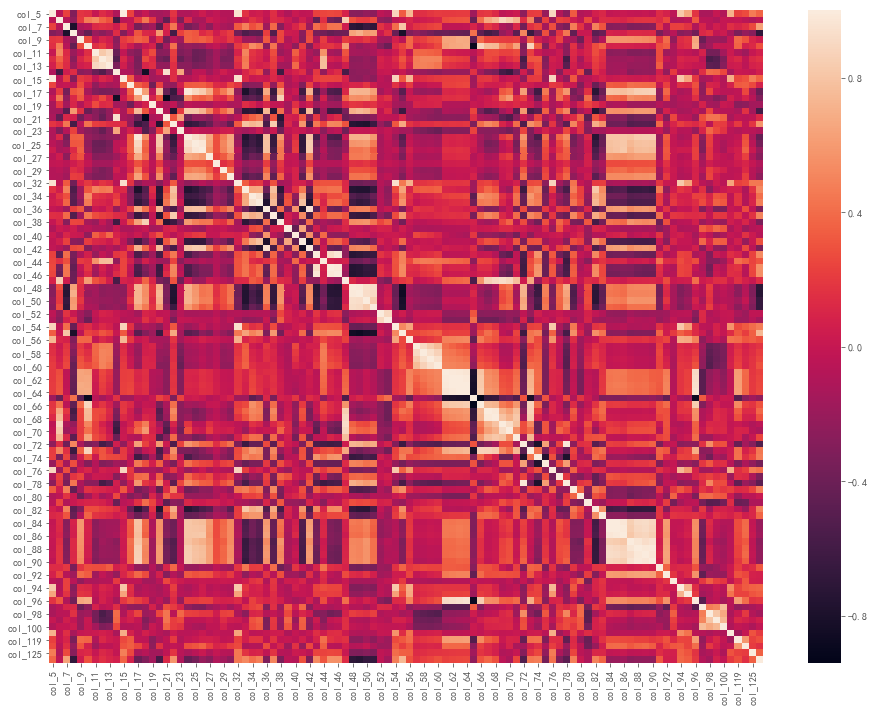

In [54]:
# get Correlation coefficient about all features
corr = df1.corr()
# plot Correlation coefficient
plt.figure(figsize=(16,12))
sns.heatmap(corr)

In [55]:
# get CV s / m
coe_var = df1.std() / df1.mean()
coe_var = coe_var.reset_index().rename(columns = {"index":"columns",0:"cv"}).sort_values("cv",ascending = False)
coe_var

columns        cv
89   col_95  4.406541
88   col_94  3.485170
48   col_54  2.994685
50   col_56  2.899684
98  col_125  2.554527
26   col_32  2.304527
0     col_5  2.202836
10   col_15  2.001117
70   col_76  1.958320
95  col_118  1.677797
5    col_10  1.613795
60   col_66  1.458867
97  col_120  1.416140
2     col_7  1.411941
4     col_9  1.358770
55   col_61  1.299581
56   col_62  1.297113
58   col_64  1.283516
57   col_63  1.280716
67   col_73  1.127291
90   col_96  1.071788
73   col_79  1.064597
99     goal  0.979483
49   col_55  0.919533
76   col_82  0.918606
79   col_85  0.878525
80   col_86  0.874533
96  col_119  0.872062
77   col_83  0.848395
78   col_84  0.847652
..      ...       ...
40   col_46  0.371569
16   col_21  0.368617
63   col_69  0.366961
6    col_11  0.365905
39   col_45  0.359370
15   col_20  0.359192
1     col_6  0.353357
66   col_72  0.350387
18   col_23  0.349713
68   col_74  0.348452
32   col_38  0.347401
85   col_91  0.345860
92   col_98  0.339039
72   col_78  0.337619
46   col_52  0.336015
91   col_97  0.335529
47   col_53  0.332594
43   col_49  0.332426
42   col_48  0.330546
44   col_50  0.329444
45   col_51  0.328629
13   col_18  0.327761
3     col_8  0.323729
93   col_99  0.320177
64   col_70  0.319408
41   col_47  0.317011
94  col_100  0.304296
7    col_12  0.290697
59   col_65  0.288732
71   col_77  0.269719

[100 rows x 2 columns]

In [56]:
high_cv = coe_var.iloc[:int(np.sqrt(df1.shape[1] - 1)),0].values
high_cv

array(['col_95', 'col_94', 'col_54', 'col_56', 'col_125', 'col_32',
       'col_5', 'col_15', 'col_76', 'col_118', 'col_10'], dtype=object)

## Exploratory Data Analysis

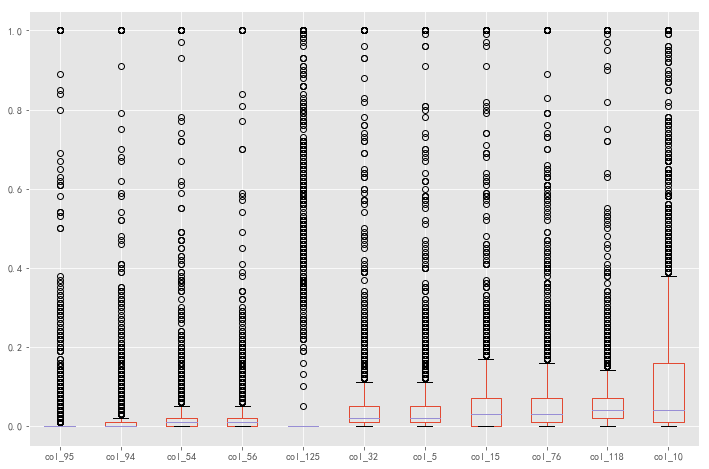

In [57]:
temp = df1[high_cv]
# box plot height cv of features 
plt.figure(figsize=(12,8))
temp.boxplot()

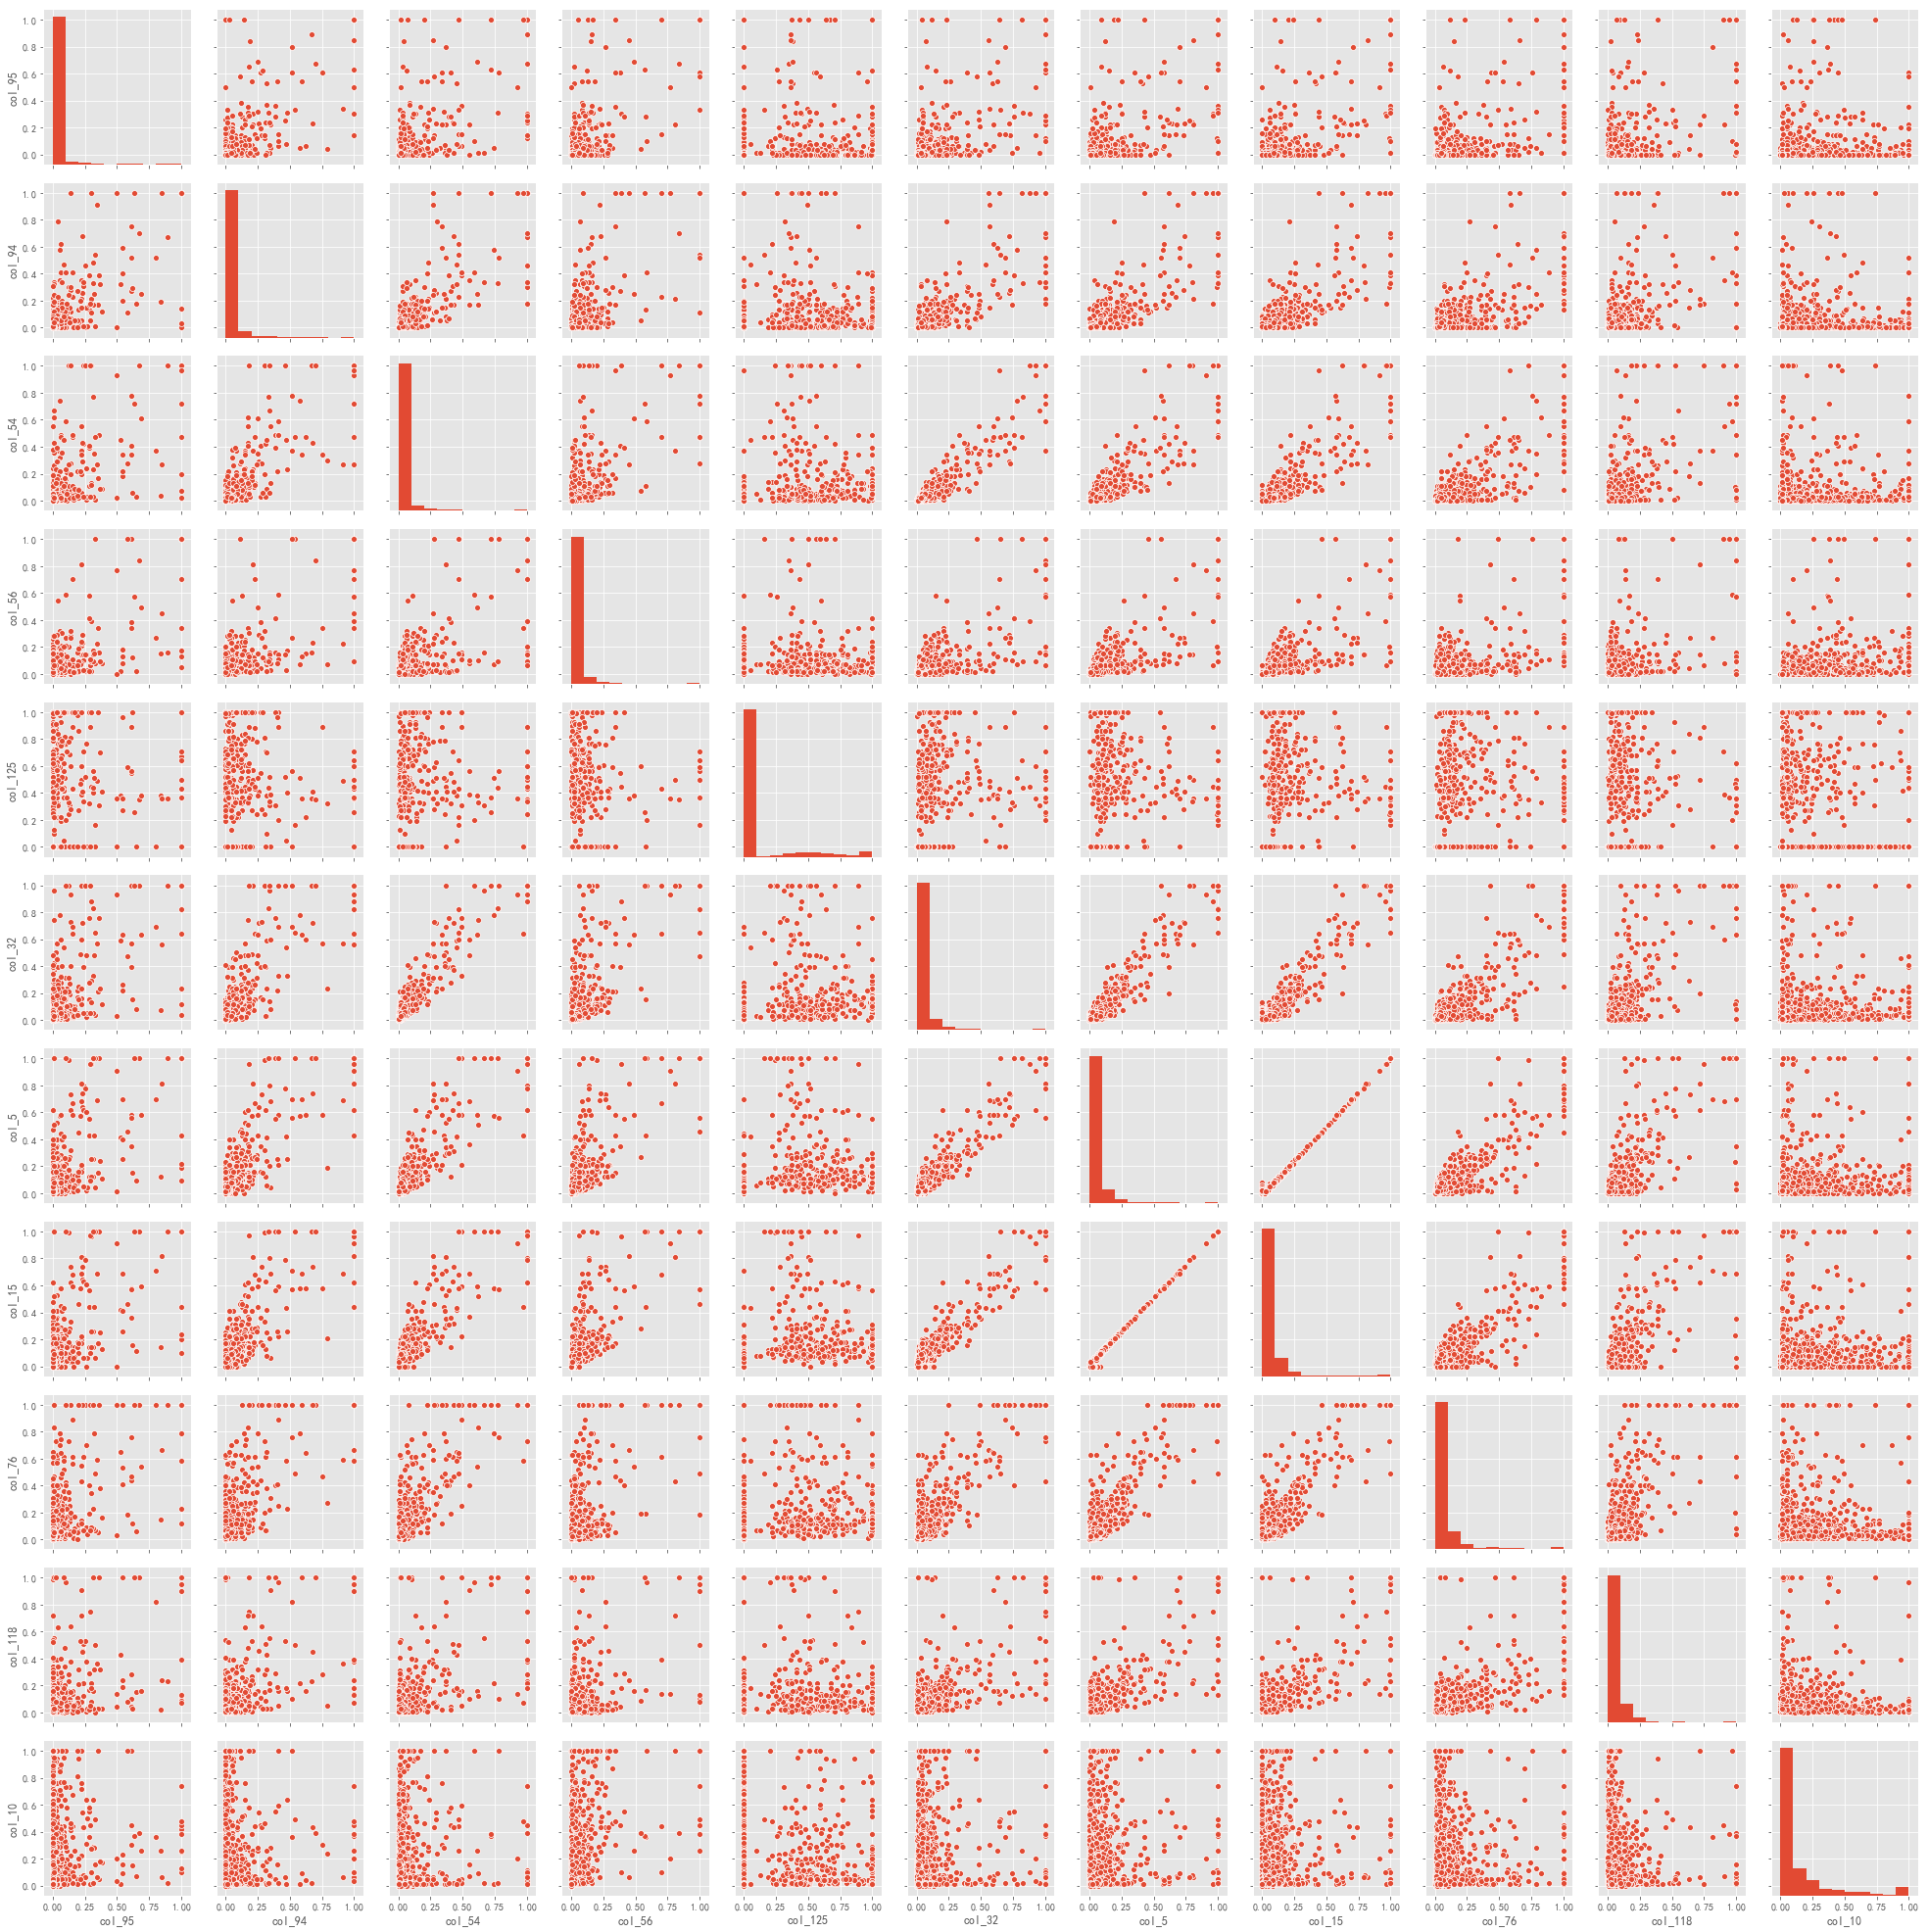

In [58]:
# scatter height cv of features 
sns.pairplot(temp)

## Model Implementation

In [59]:
# split train and test 
train = df1.iloc[:train_size,:]
test = df1.iloc[train_size:,:]
train_y = train.pop('goal')
test_y = test.pop("goal")
train_X = train
test_X = test

### A Linear Regression

In [60]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Fit a linear model using least squares to the training set and report the test error.   
lr = LinearRegression(normalize=True)
lr.fit(train_X,train_y)
y_pre = lr.predict(test_X)
# process  abnormal data
y_train = lr.predict(train_X)
y_pre = [0 if i < 0 else i for i in y_pre]
# print train and test error
print("train mse is ",mean_squared_error(train_y,y_train))
print("test mse is ",mean_squared_error(test_y,y_pre))

train mse is  0.01654205779246721
test mse is  0.01938511758505883


In [61]:
# use pca model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.decomposition import PCA

temp = pd.concat([train_X,test_X])
size = train_X.shape[0]

# use pca
pca = PCA(n_components=0.95)
pca.fit(temp)
tt = pca.transform(temp)

train_X = tt[:size,:]
test_X = tt[size:,:]

# Fit a linear model using least squares to the training set and report the test error.   
lr = LinearRegression(normalize=True)
lr.fit(train_X,train_y)
y_pre = lr.predict(test_X)
# process  abnormal data
y_train = lr.predict(train_X)
# print train and test error
print("train mse is ",mean_squared_error(train_y,y_train))
print("test mse is ",mean_squared_error(test_y,y_pre))

train mse is  0.018685223178866346
test mse is  0.018270980851041025


###  Ridge Regularization

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# search for an optimal value of alpha for ridge model
alphas = np.linspace(0.1,10,50)
for k in alphas:
    rd = Ridge(alpha=k)
    # 10 fold cross-validation
    scores = cross_val_score(rd, train_X, train_y, cv=10, scoring='neg_mean_squared_error')
    # print train error
    print("alpha is ",k,"train mse is ",-scores.mean())
# Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.
ridge = Ridge(alpha=2.726)
ridge.fit(train_X,train_y)
y_pre = ridge.predict(test_X)
# print test error
print("test mse is ",mean_squared_error(test_y,y_pre))

alpha is  0.1 train mse is  0.01983166286158823
alpha is  0.3020408163265306 train mse is  0.019824592950049798
alpha is  0.5040816326530613 train mse is  0.01981780988719257
alpha is  0.7061224489795919 train mse is  0.01981130086191788
alpha is  0.9081632653061225 train mse is  0.019805053801234422
alpha is  1.1102040816326533 train mse is  0.019799057318695468
alpha is  1.3122448979591839 train mse is  0.019793300667066395
alpha is  1.5142857142857145 train mse is  0.019787773694824196
alpha is  1.716326530612245 train mse is  0.019782466806133048
alpha is  1.9183673469387756 train mse is  0.01977737092397736
alpha is  2.1204081632653065 train mse is  0.019772477456166306
alpha is  2.322448979591837 train mse is  0.019767778263953387
alpha is  2.5244897959183676 train mse is  0.019763265633040056
alpha is  2.7265306122448982 train mse is  0.019758932246755744
alpha is  2.928571428571429 train mse is  0.01975477116122676
alpha is  3.1306122448979594 train mse is  0.019750775782364824

### Lasso Regularization

In [63]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate


# search for an optimal value of alpha for Lasso model
alphas = np.linspace(0.1,10,50)
for k in alphas:
    rd = Lasso(alpha=k)
    scores = cross_val_score(rd, train_X, train_y, cv=10, scoring='neg_mean_squared_error')
    print("alpha is ",k,"train mse is ",-scores.mean())
    
# Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, 
# along with a list of the variables selected by the model. 
lass = Lasso(alpha = 0.5)
lass.fit(train_X,train_y)
y_pre = lass.predict(test_X)
print("test mse is ",mean_squared_error(test_y,y_pre))

alpha is  0.1 train mse is  0.04669088033226224
alpha is  0.3020408163265306 train mse is  0.05651041852190025
alpha is  0.5040816326530613 train mse is  0.05651041852190025
alpha is  0.7061224489795919 train mse is  0.05651041852190025
alpha is  0.9081632653061225 train mse is  0.05651041852190025
alpha is  1.1102040816326533 train mse is  0.05651041852190025
alpha is  1.3122448979591839 train mse is  0.05651041852190025
alpha is  1.5142857142857145 train mse is  0.05651041852190025
alpha is  1.716326530612245 train mse is  0.05651041852190025
alpha is  1.9183673469387756 train mse is  0.05651041852190025
alpha is  2.1204081632653065 train mse is  0.05651041852190025
alpha is  2.322448979591837 train mse is  0.05651041852190025
alpha is  2.5244897959183676 train mse is  0.05651041852190025
alpha is  2.7265306122448982 train mse is  0.05651041852190025
alpha is  2.928571428571429 train mse is  0.05651041852190025
alpha is  3.1306122448979594 train mse is  0.05651041852190025
alpha is  

### StandardScaler and Lasso

In [ ]:
# import libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# standar all train_X and test_X data
# Repeat with standardized features. Report the test error for both cases and compare them.
std = StandardScaler()
ss_train = std.fit_transform(train)
ss_test = std.transform(test)

# search for an optimal value of alpha for Lasso model
alphas = np.linspace(0.1,5,50)
for k in alphas:
    rd = Lasso(alpha=k)
    scores = cross_val_score(rd, ss_train, train_y, cv=10, scoring='neg_mean_squared_error')
    print("alpha is ",k,"train mse is ",-scores.mean())
    
lass = Lasso(alpha=0.1)
lass.fit(ss_train,train_y)
y_pre = lass.predict(ss_test)

print("test mse is ",mean_squared_error(test_y,y_pre))


/home/wangjiacun/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wangjiacun/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/wangjiacun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


alpha is  0.1 train mse is  0.03393722615448981
alpha is  0.2 train mse is  0.05651041852190025
alpha is  0.30000000000000004 train mse is  0.05651041852190025
alpha is  0.4 train mse is  0.05651041852190025
alpha is  0.5 train mse is  0.05651041852190025
alpha is  0.6 train mse is  0.05651041852190025
alpha is  0.7000000000000001 train mse is  0.05651041852190025
alpha is  0.8 train mse is  0.05651041852190025
alpha is  0.9 train mse is  0.05651041852190025
alpha is  1.0 train mse is  0.05651041852190025
alpha is  1.1 train mse is  0.05651041852190025
alpha is  1.2000000000000002 train mse is  0.05651041852190025
alpha is  1.3000000000000003 train mse is  0.05651041852190025
alpha is  1.4000000000000001 train mse is  0.05651041852190025
alpha is  1.5000000000000002 train mse is  0.05651041852190025
alpha is  1.6 train mse is  0.05651041852190025
alpha is  1.7000000000000002 train mse is  0.05651041852190025
alpha is  1.8000000000000003 train mse is  0.05651041852190025
alpha is  1.900